In [1]:
import warnings
import argparse
import DrawingWithTensors
import pandas as pd
from random import randint
import torch
import os
import argparse
import time

# initiate the parser
parser = argparse.ArgumentParser(description = "List of options to run application when creating custom datset")

parser = argparse.ArgumentParser()  
parser.add_argument("-V", "--version", help="show program version", action="store_true")
parser.add_argument("-s", "--size", help="upper bound of number of images to include")
parser.add_argument("-t", "--rotations", help="allow random image and tensor rotations to be made")
parser.add_argument("-r", "--root_folder", help="destination for root folder")
parser.add_argument("-g", "--generation", help="which generation number we are using")
parser.add_argument("-d", "--dimensions", help="square image dimensions")

#defined defaults
upper_bound = 10
isize = 416
iteration = "0"
rotations= False
ROOT = "/home/peo5032/Documents/COMP594/input/gen"


# read arguments from the command line
args = parser.parse_args(['-g','8','-s','1000','-d','416','-t','true'])

# check for --version or -V
if args.version:  
    print("this is version 0.1", flush=True)
    
if args.size: 
    print("will create", upper_bound, "images", flush=True)
    upper_bound = int(args.size) + 1

if args.rotations: 
    rotations= args.rotations.lower() == "true"
    print("rotations was", args.rotations, flush=True)
    
if args.root_folder:  
    os.makedirs(root_folder, exist_ok=True)
    print("destination was", args.root_folder, flush=True)
    
if args.generation:
    print("iteration was", args.generation, flush=True)
    iteration = args.generation
    
if args.dimensions:
    print("dimension chosen was", args.dimensions,flush=True)
    isize = int(args.dimensions)
    
factor = 0.45

os.makedirs(ROOT, exist_ok=True)
IMAGE_PATH = ROOT + iteration + "/roads"
os.makedirs(IMAGE_PATH, exist_ok=True)

TENSOR_PATH = ROOT + iteration + "/tensor_values"
os.makedirs(TENSOR_PATH, exist_ok=True)

PICKLE_PATH = ROOT + iteration

df = pd.DataFrame()
NumLanes = []
ShldrWidth = []
ShldrWidthCenter = []
RoadWidth = []
FileNames = []
imageGen = DrawingWithTensors.datasetFactory(IMAGE_SIZE = isize)
rotationDegrees = [0,90]
b_type = ["trees", "water", "desert"]
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


will create 10 images
rotations was true
iteration was 8
dimension chosen was 416


In [2]:
tmp_tensor = torch.zeros(1,isize,isize,dtype=torch.float32)
since = time.time()
for i in range(0,upper_bound):
    
    if i % 10 == 0:
        print("Picture ",i, flush=True)
    c = randint(0,80)
    lanecount = randint(1,5)
    laneWidth = randint(17,35)
    lineWidth = randint(1,2)
    shoulderWidth = randint(0,89)
    
    #create tuple of information, img, and tensor
    tuple,img,tmp_tensor = imageGen.generateNewImageWithTensor(c,
                                                               lanecount,
                                                               laneWidth,
                                                               lineWidth,
                                                               shoulderWidth,
                                                               tmp_tensor,
                                                               b_type[randint(0,len(b_type)-1)])
    
    roadWidth,laneCount,shoulderWidth,centerShldrWidth = tuple       
    
    if rotations:
        img, tmp_tensor = DrawingWithTensors.rotationOfImageAndTensor(img,
                                                                      tmp_tensor,
                                                                      imageGen.classList,
                                                                      rotationDegrees[randint(0,len(rotationDegrees)-1)],
                                                                     )
        
    NumLanes.append(laneCount)
    ShldrWidth.append(shoulderWidth)
    RoadWidth.append (roadWidth)
    ShldrWidthCenter.append(centerShldrWidth)
    
    FileName = str(i) + ".png"
    FileNames.append(FileName)
    img.save(IMAGE_PATH + "/" + FileName,"PNG")
    
    #save tensor
    torch.save(tmp_tensor, TENSOR_PATH + "/"+ str(i) + '.pt')
    
    img.close()
    tmp_tensor = torch.mul(tmp_tensor, 0)

df['NumLanes'] = NumLanes
df['ShldrWidth'] = ShldrWidth
df['RdwyWidth'] = RoadWidth
df['ShldrWidthCenter'] = ShldrWidthCenter
df['FileName'] = FileNames

df.to_pickle(PICKLE_PATH + "/train_images_v2.pkl")

total = time.time() - since
print("program terminated in {:0f}s".format(total), flush=True)

Picture  0
Picture  10
Picture  20
Picture  30
Picture  40
Picture  50
Picture  60
Picture  70
Picture  80
Picture  90
Picture  100
Picture  110
Picture  120
Picture  130
Picture  140
Picture  150
Picture  160
Picture  170
Picture  180
Picture  190
Picture  200
Picture  210
Picture  220
Picture  230
Picture  240
Picture  250
Picture  260
Picture  270
Picture  280
Picture  290
Picture  300
Picture  310
Picture  320
Picture  330
Picture  340
Picture  350
Picture  360
Picture  370
Picture  380
Picture  390
Picture  400
Picture  410
Picture  420
Picture  430
Picture  440
Picture  450
Picture  460
Picture  470
Picture  480
Picture  490
Picture  500
Picture  510
Picture  520
Picture  530
Picture  540
Picture  550
Picture  560
Picture  570
Picture  580
Picture  590
Picture  600
Picture  610
Picture  620
Picture  630
Picture  640
Picture  650
Picture  660
Picture  670
Picture  680
Picture  690
Picture  700
Picture  710
Picture  720
Picture  730
Picture  740
Picture  750
Picture  760
Picture  7

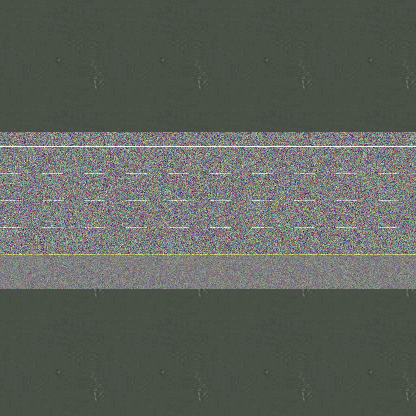

In [3]:
from PIL import Image
#testing output of data-set
img = Image.open(IMAGE_PATH+"/500.png")
test_tensor = torch.load(TENSOR_PATH+'/500.pt')
img

index for channel road : 0


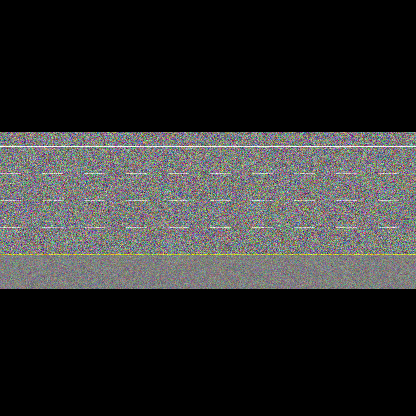

In [4]:
DrawingWithTensors.showInferenceOnImage(img, test_tensor, "road", 0.6, imageGen.classMap)